# YOLO5 모델, 데이터 다운로드

In [ ]:
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt
%mkdir /content/yolov5/kickboard
%cd /content/yolov5/kickboard
!curl -L "https://universe.roboflow.com/ds/dzqjOgDhUH?key=KEY" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
%mkdir /content/yolov5/helmet
%cd /content/yolov5/helmet
!curl -L "https://universe.roboflow.com/ds/GsoK9ngwT5?key=KEY" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
%mkdir /content/yolov5/person
%cd /content/yolov5/person
!curl -L "https://universe.roboflow.com/ds/7YcpmtSrkW?key=KEY" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


import torch
from IPython.display import Image, clear_output

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: train/images/BikesHelmets537_png.rf.2aaef64c40f00420c9c9b76ac6cdc214.jpg  
 extracting: train/images/BikesHelmets53_png.rf.6822052ca2b76f6d3c5ff96a54bf1553.jpg  
 extracting: train/images/BikesHelmets541_png.rf.53b0459bde4afcbbbfd60d8cf07ba1a9.jpg  
 extracting: train/images/BikesHelmets549_png.rf.e098ef684470e0f054cfa79d9caaca83.jpg  
 extracting: train/images/BikesHelmets554_png.rf.cf0bef6f4a3739a1b72584c98e4f7eb6.jpg  
 extracting: train/images/BikesHelmets559_png.rf.ab676f757553871d76683d9b1a505c58.jpg  
 extracting: train/images/BikesHelmets570_png.rf.2bb352fbf4e4468916e592f40e13959b.jpg  
 extracting: train/images/BikesHelmets572_png.rf.9c6fe0cf6ebe1b5fca83cc526af3ff2d.jpg  
 extracting: train/images/BikesHelmets579_png.rf.29ef1645a344790885a6510642b2a8c3.jpg  
 extracting: train/images/BikesHelmets57_png.rf.837bfbb293d86894def20c62e670481d.jpg  
 extracting: train/images/BikesHelmets585_png.rf.9cf0a8f314556c720f77d0271b3cc3bd.jpg 

# 킥보드 데이터셋 다운


In [ ]:
from glob import glob
k_train_img_list = glob('/content/yolov5/kickboard/train/images/*.jpg')
k_test_img_list = glob('/content/yolov5/kickboard/test/images/*.jpg')
k_val_img_list = glob('/content/yolov5/kickboard/valid/images/*.jpg')
print(len(k_train_img_list),len(k_test_img_list),len(k_val_img_list))

2262 0 93


In [ ]:
from sklearn.model_selection import train_test_split

k_val_img_list, k_test_img_list = train_test_split(k_val_img_list, test_size=0.5, random_state=42)
print(len(k_train_img_list),len(k_test_img_list),len(k_val_img_list))

2262 47 46


In [ ]:
import yaml

with open('/content/yolov5/kickboard/train.txt','w') as f:
    f.write('\n'.join(k_train_img_list)+'\n')

with open('/content/yolov5/kickboard/test.txt','w') as f:
    f.write('\n'.join(k_test_img_list)+'\n')

with open('/content/yolov5/kickboard/val.txt','w') as f:
    f.write('\n'.join(k_val_img_list)+'\n')

In [ ]:
from glob import glob
h_train_img_list = glob('/content/yolov5/helmet/train/images/*.jpg')
h_test_img_list = glob('/content/yolov5/helmet/test/images/*.jpg')
h_val_img_list = glob('/content/yolov5/helmet/valid/images/*.jpg')
print(len(h_train_img_list),len(h_test_img_list),len(h_val_img_list))

413 64 116


In [ ]:
import yaml

with open('/content/yolov5/helmet/train.txt','w') as f:
    f.write('\n'.join(h_train_img_list)+'\n')

with open('/content/yolov5/helmet/test.txt','w') as f:
    f.write('\n'.join(h_test_img_list)+'\n')

with open('/content/yolov5/helmet/val.txt','w') as f:
    f.write('\n'.join(h_val_img_list)+'\n')

In [ ]:
from glob import glob
p_train_img_list = glob('/content/yolov5/person/train/images/*.jpg')
p_test_img_list = glob('/content/yolov5/person/test/images/*.jpg')
p_val_img_list = glob('/content/yolov5/person/valid/images/*.jpg')
print(len(p_train_img_list),len(p_test_img_list),len(p_val_img_list))

1988 0 50


In [ ]:
from sklearn.model_selection import train_test_split

p_val_img_list, p_test_img_list = train_test_split(p_val_img_list, test_size=0.5, random_state=42)
print(len(p_train_img_list),len(p_test_img_list),len(p_val_img_list))

1988 25 25


In [ ]:
import yaml

with open('/content/yolov5/person/train.txt','w') as f:
    f.write('\n'.join(p_train_img_list)+'\n')

with open('/content/yolov5/person/test.txt','w') as f:
    f.write('\n'.join(p_test_img_list)+'\n')

with open('/content/yolov5/person/val.txt','w') as f:
    f.write('\n'.join(p_val_img_list)+'\n')

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line,cell):
    with open(line,'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%cat /content/yolov5/kickboard/data.yaml

train: ../train/images
val: ../valid/images

nc: 2
names: ['scooter', 'things']

In [ ]:
%cat /content/yolov5/helmet/data.yaml

train: ../train/images
val: ../valid/images

nc: 2
names: ['Helmet', 'No Helmet']

In [ ]:
%cat /content/yolov5/person/data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['Person']

In [ ]:
# 위에꺼 보고 names랑 nc 정해주기
## data yaml에다 옮겨주자

# %cd yolov5
%%writetemplate /content/yolov5/kickboard/data.yaml
train: #train images 
  - kickboard/train/images
  - helmet/train/images
  - person/train/images
test: #test images
  - kickboard/valid/images
  - helmet/test/images
  - person/valid/images
val: #validation images
  - kickboard/valid/images
  - helmet/valid/images
  - person/valid/images

nc: 5
names: ['scooter', 'things','Helmet', 'No Helmet','person' ]

## 라벨 수정

In [ ]:
# 헬멧
from glob import glob
h_train_label_list = glob('/content/yolov5/helmet/train/labels/*.txt')
h_test_label_list = glob('/content/yolov5/helmet/test/labels/*.txt')
h_val_label_list = glob('/content/yolov5/helmet/valid/labels/*.txt')
print(len(h_train_label_list),len(h_test_label_list),len(h_val_label_list))

413 64 116


In [ ]:
# 헬멧
for glob_data in [h_train_label_list, h_test_label_list, h_val_label_list]:
    for txt_path in glob_data:
        with open(txt_path, "r") as f:
            lines = f.readlines()
        with open(txt_path, "w") as f:
            for line in lines:
                if line[0] == '0':
                    line = line.replace('0','2',1)
                elif line[0] == '1':
                    line = line.replace('1','3',1)
                f.write(line)

In [ ]:
from glob import glob
p_train_label_list = glob('/content/yolov5/person/train/labels/*.txt')
p_test_label_list = glob('/content/yolov5/person/test/labels/*.txt')
p_val_label_list = glob('/content/yolov5/person/valid/labels/*.txt')
print(len(p_train_label_list),len(p_test_label_list),len(p_val_label_list))

1988 0 50


In [ ]:
# 사람
for glob_data in [p_train_label_list, p_test_label_list, p_val_label_list]:
    for txt_path in glob_data:
        with open(txt_path, "r") as f:
            lines = f.readlines()
        with open(txt_path, "w") as f:
            for line in lines:
                line = line.replace('0','4',1)
                f.write(line)

# 모델 생성

In [ ]:
import yaml

with open('/content/yolov5/data/combined.yaml', 'r') as stream:
    num_classes =str(yaml.safe_load(stream)['nc'])

%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
# 학습할 모델에 맞게 변경
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cat /content/yolov5/models/custom_yolov5s.yaml


# Parameters
nc: 5  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, Fa

### 학습(Training)


In [ ]:
%%time
%cd /content/yolov5/
# weight는 학습이니 안준다.
# 난 pro니 epochs 두배해도 될듯??
# 학습 더해야할듯?? 성능 그리 안나왔음 100번은
!python train.py --batch 128 --epochs 150 --data ./data/combined.yaml --cfg ./models/custom_yolov5s.yaml --weights yolov5s.pt --name kickboard_results --cache  --freeze 10

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/custom_yolov5s.yaml, data=./data/combined.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=128, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=kickboard_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[10], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-18-gd7955fe Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=

In [ ]:
!ls runs/train/kickboard_results

confusion_matrix.png				   results.csv
events.out.tfevents.1669987538.2f17984a10ed.280.0  results.png
F1_curve.png					   train_batch0.jpg
hyp.yaml					   train_batch1.jpg
labels_correlogram.jpg				   train_batch2.jpg
labels.jpg					   val_batch0_labels.jpg
opt.yaml					   val_batch0_pred.jpg
P_curve.png					   val_batch1_labels.jpg
PR_curve.png					   val_batch1_pred.jpg
R_curve.png					   weights


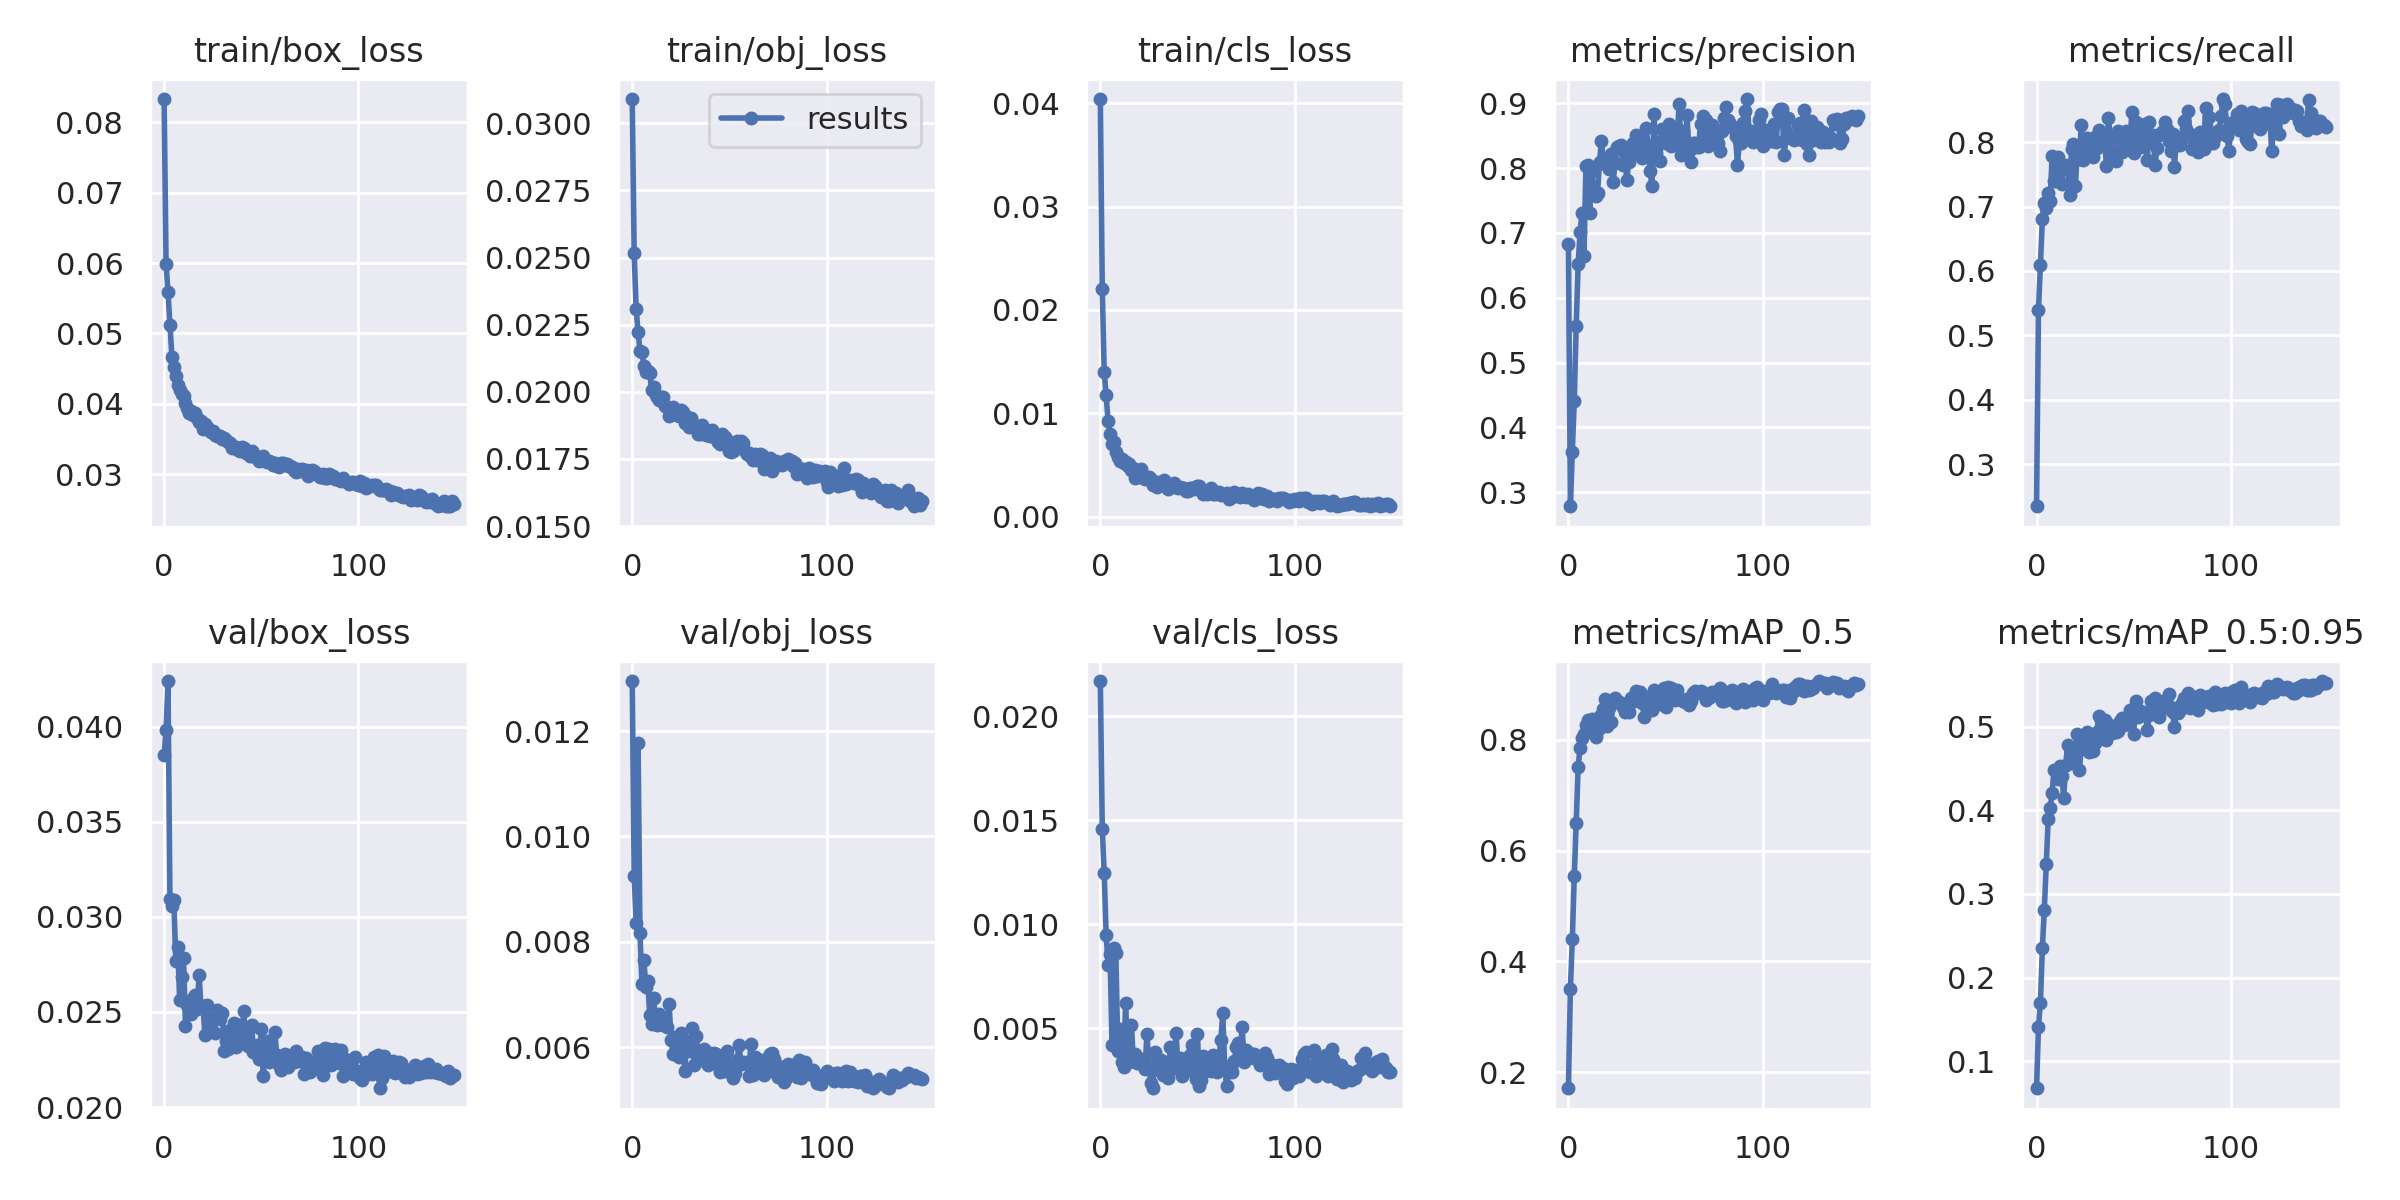

In [ ]:
Image(filename='runs/train/kickboard_results/results.png', width =1000)

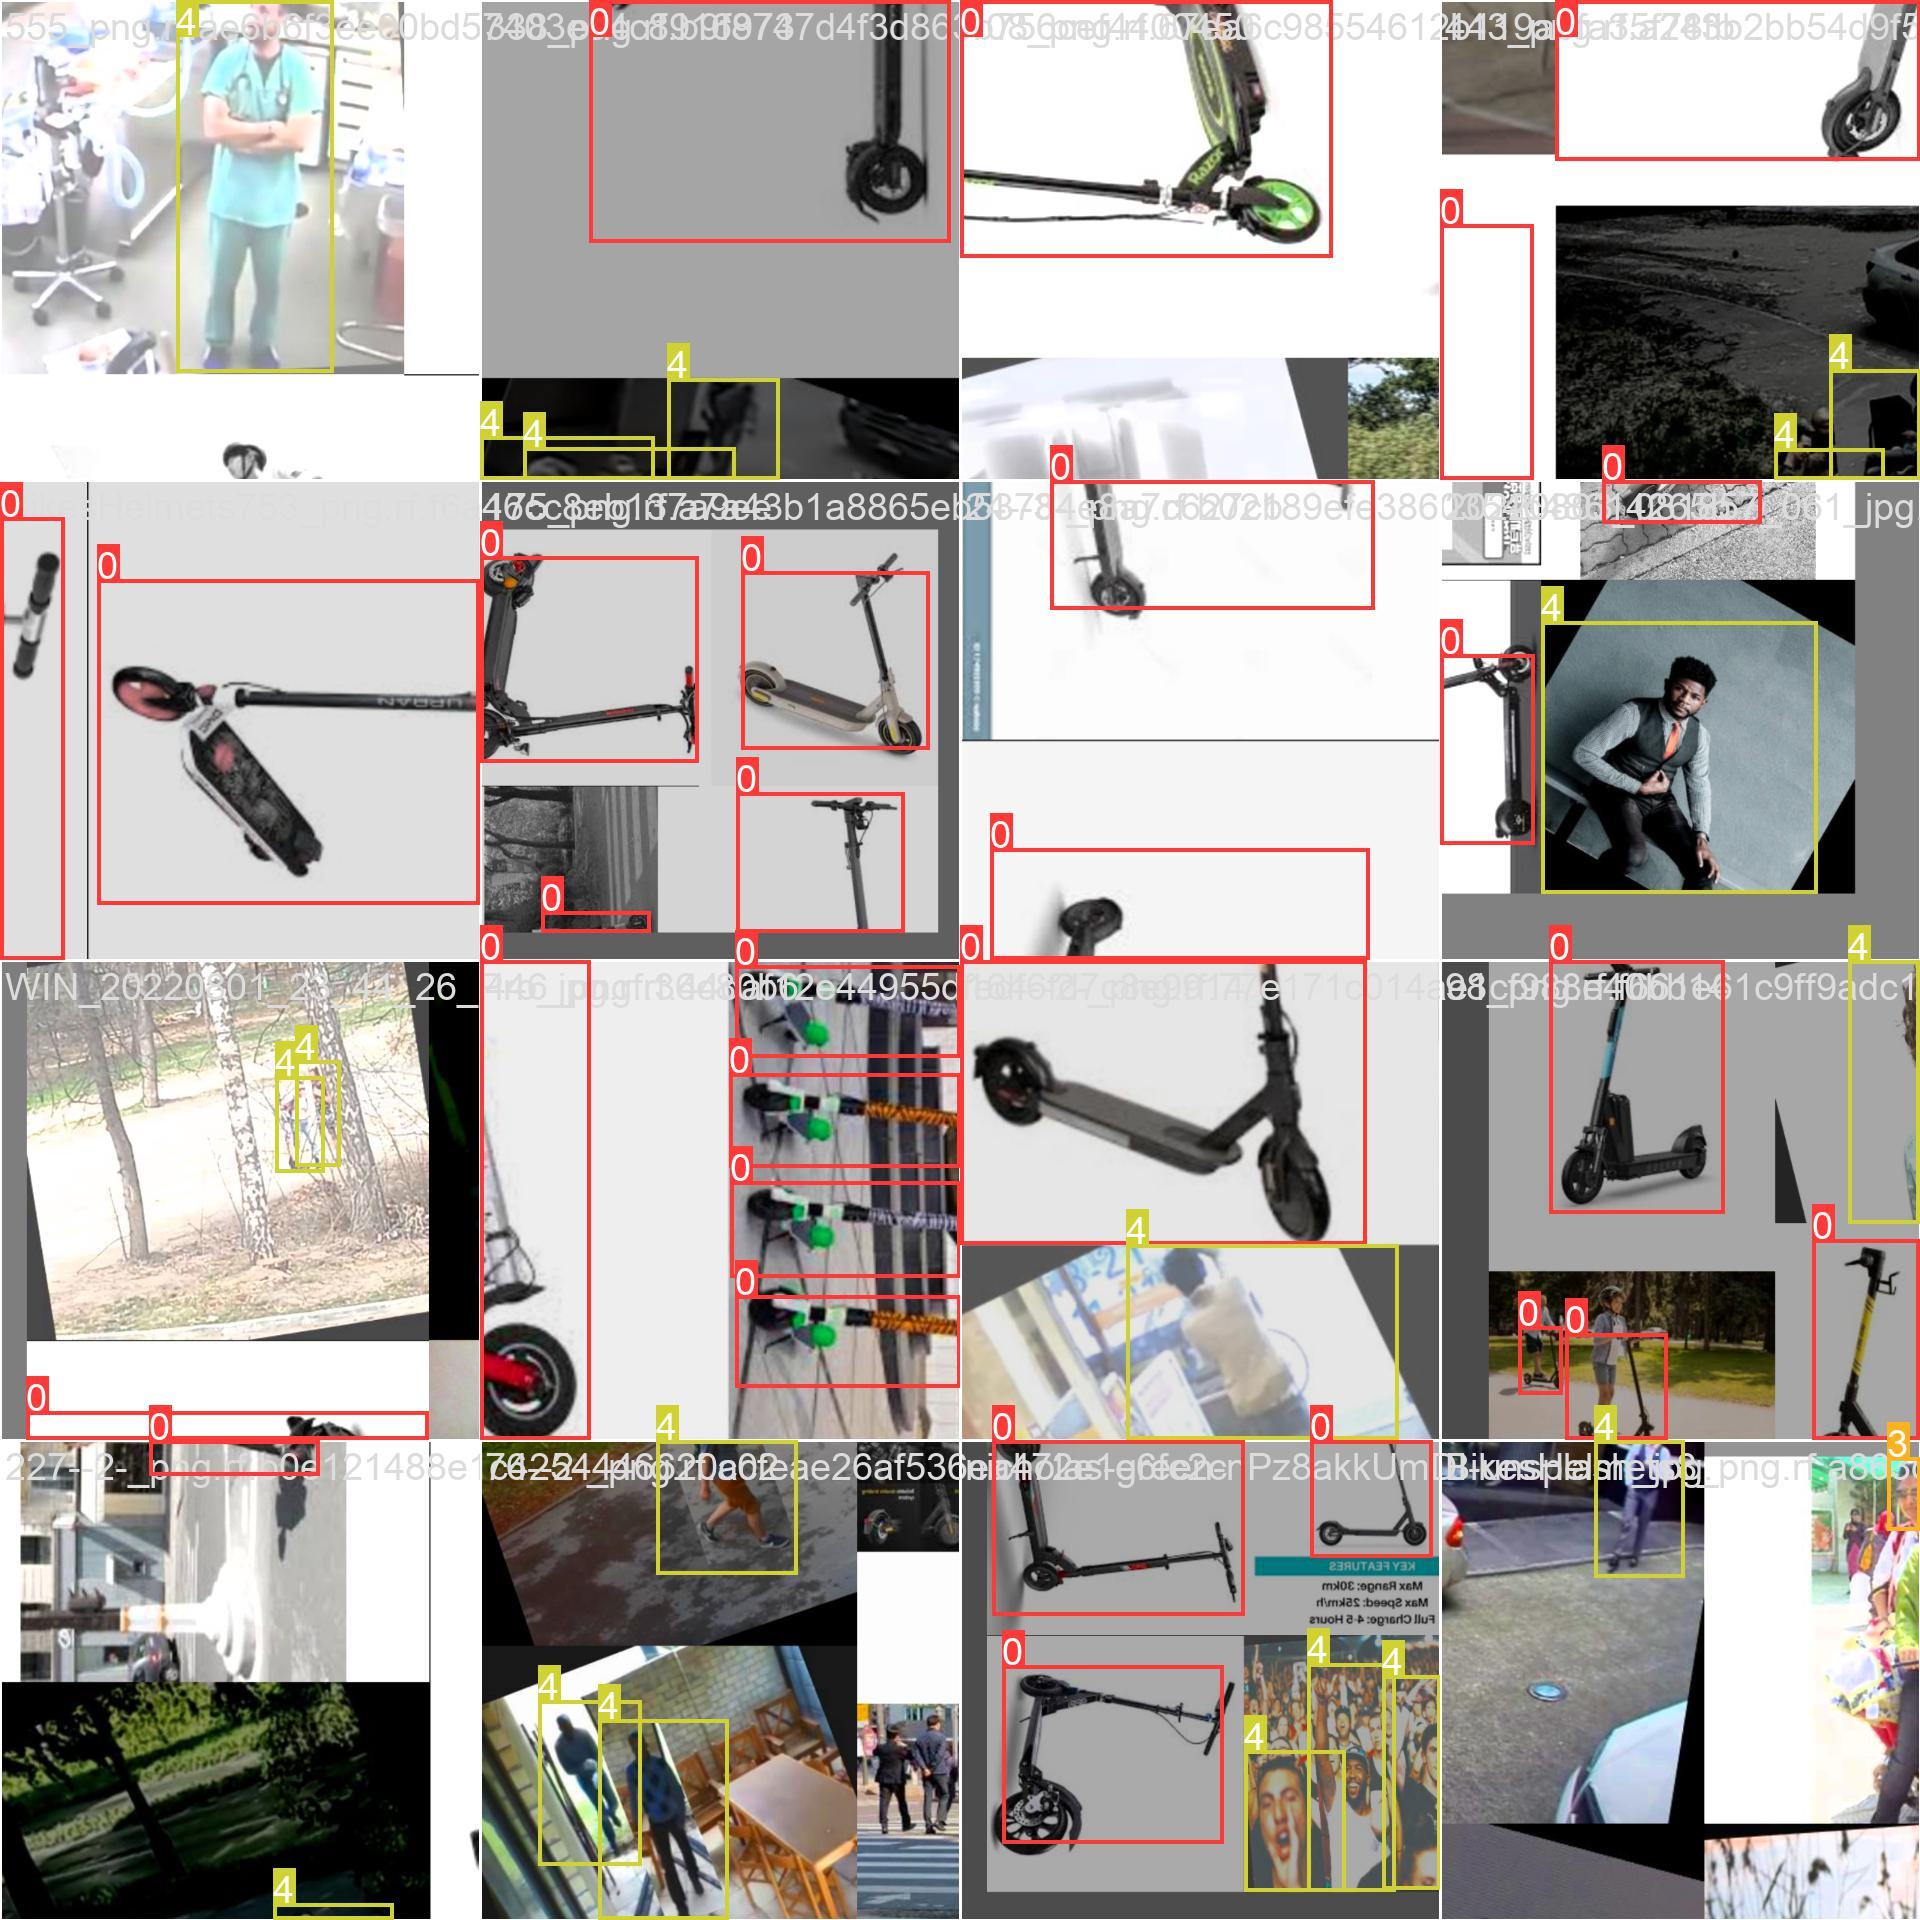

In [ ]:
Image(filename='runs/train/kickboard_results/train_batch0.jpg', width=1000)

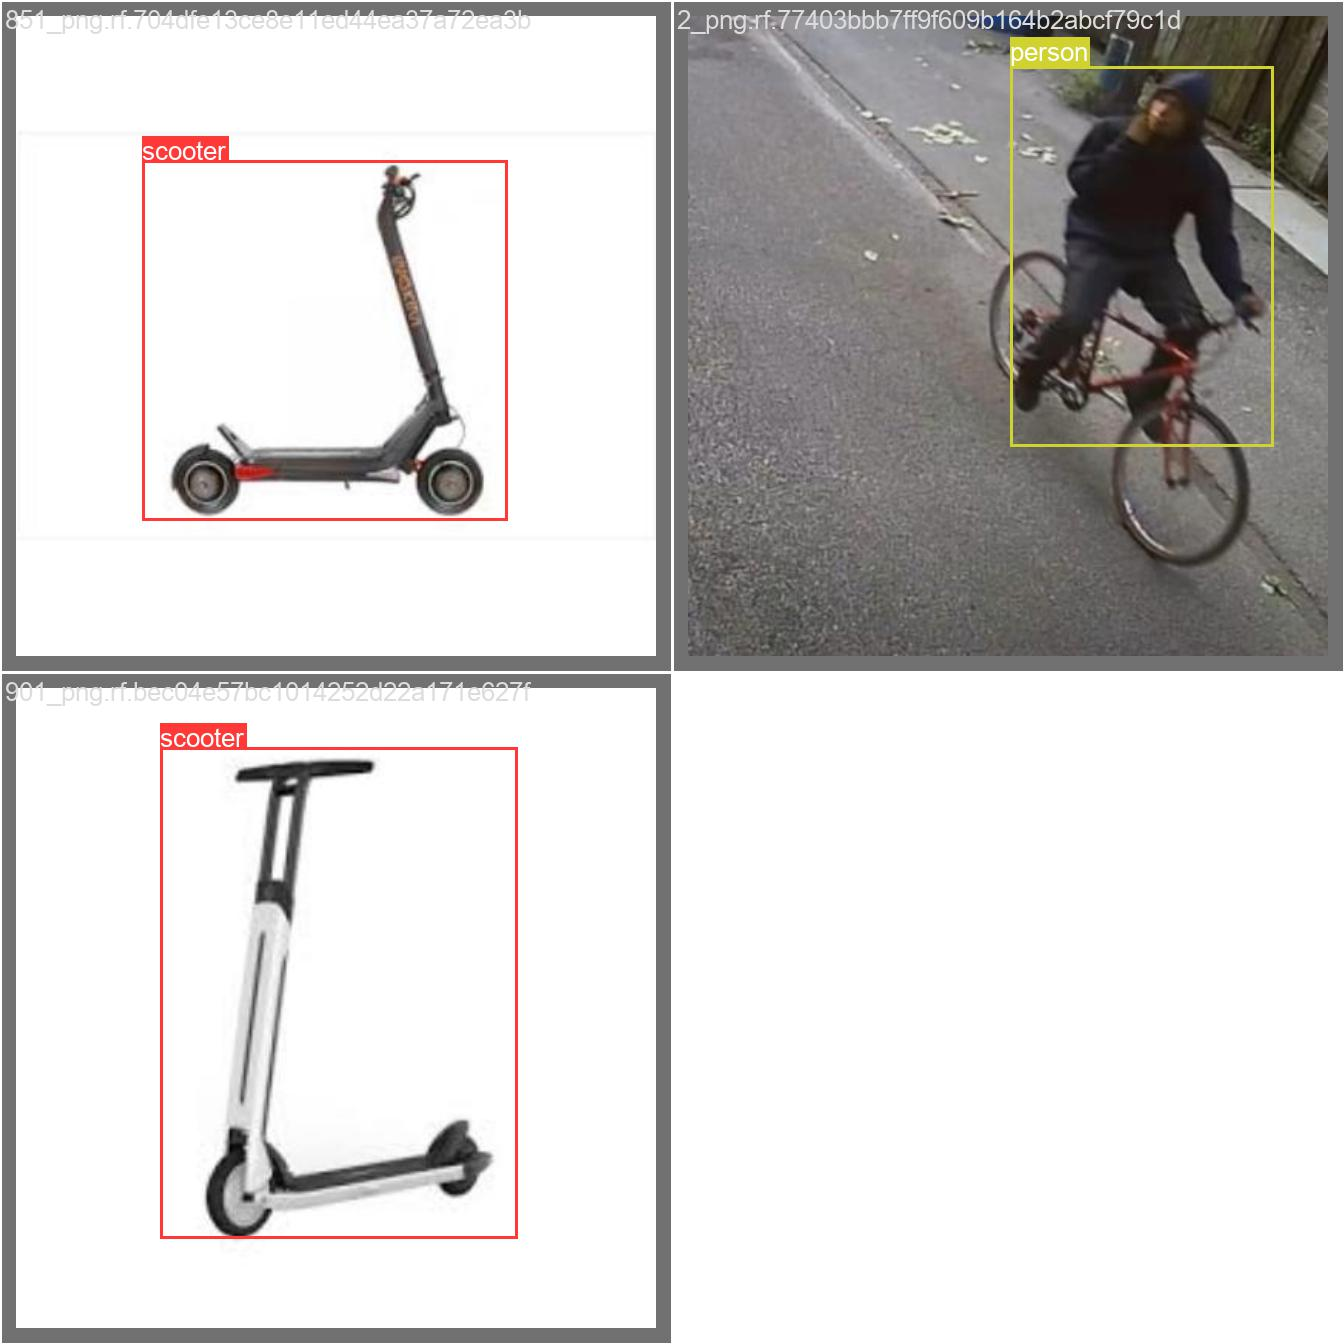

In [ ]:
Image(filename='runs/train/kickboard_results/val_batch1_labels.jpg', width=1000)

# 검증

# 추론

In [ ]:
%ls runs/train/kickboard_results/weights

best.pt  last.pt


In [ ]:
!python detect.py --weights runs/train/kickboard_results/weights/best.pt --img 416 --conf 0.4 --source ./kickboard/valid/images

detect: weights=['runs/train/kickboard_results/weights/best.pt'], source=./kickboard/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-18-gd7955fe Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/93 /content/yolov5/kickboard/valid/images/111_png.rf.6bf8efa7418e7e70e1b160698a0a65cb.jpg: 416x416 2 scooters, 8.2ms
image 2/93 /content/yolov5/kickboard/valid/images/143_png.rf.638e9c5b161f14c40d1c58ff0237c7cb.jpg: 416x416 1 scooter, 8.2ms
image 3/93 /content/yolov5/kickboard/valid/images/147--4-_png.rf.a895cf

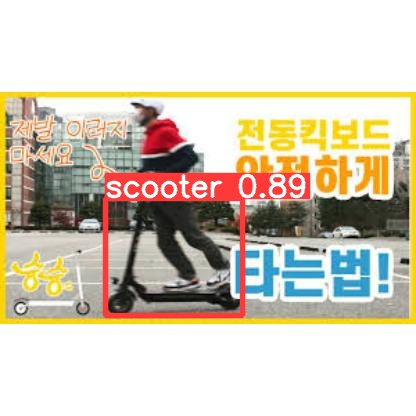

In [ ]:
import glob
import random 

image_name = random.choice(glob.glob('runs/detect/exp/*.jpg'))
display(Image(filename=image_name))

In [ ]:
!python detect.py --weights runs/train/kickboard_results/weights/best.pt --img 416 --conf 0.4 --source ./helmet/valid/images

detect: weights=['runs/train/kickboard_results/weights/best.pt'], source=./helmet/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-18-gd7955fe Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/116 /content/yolov5/helmet/valid/images/10_jpg.rf.8f71404a6f610bd971173142401fa0f6.jpg: 320x416 1 No Helmet, 11.4ms
image 2/116 /content/yolov5/helmet/valid/images/11_jpg.rf.929e849f3fe353ffb39dfd6720d83de6.jpg: 320x416 1 Helmet, 4 No Helmets, 7.2ms
image 3/116 /content/yolov5/helmet/valid/images/18_jpg.rf.320a618

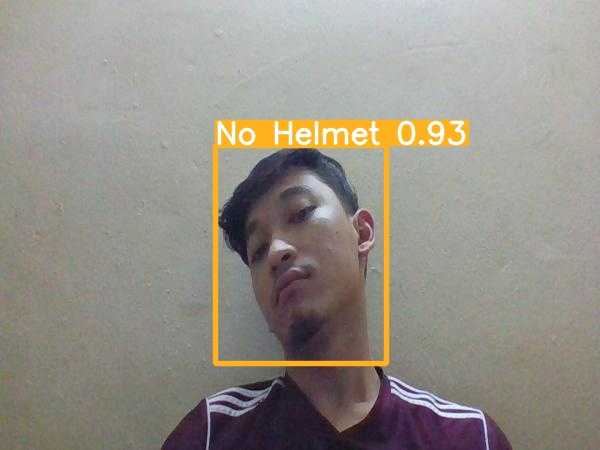

In [ ]:
import glob
import random 

image_name = random.choice(glob.glob('runs/detect/exp3/*.jpg'))
display(Image(filename=image_name))

In [ ]:
!python detect.py --weights runs/train/kickboard_results/weights/best.pt --img 416 --conf 0.4 --source ./person/valid/images

detect: weights=['runs/train/kickboard_results/weights/best.pt'], source=./person/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-18-gd7955fe Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/50 /content/yolov5/person/valid/images/101_png.rf.59d81b842166bfcaab290a23fb6469e4.jpg: 416x416 2 persons, 8.1ms
image 2/50 /content/yolov5/person/valid/images/105_png.rf.13f21990c84560185c68132b0bf596f4.jpg: 416x416 1 person, 8.1ms
image 3/50 /content/yolov5/person/valid/images/108_png.rf.6e99862731067fa7e4625d2b

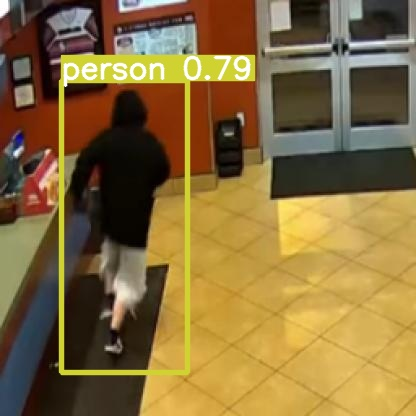

In [ ]:
import glob
import random 

image_name = random.choice(glob.glob('runs/detect/exp4/*.jpg'))
display(Image(filename=image_name))

# 저장

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%mkdir /content/drive/My\ Drive/kickboard2
%cp runs/train/kickboard_results/weights/best.pt /content/drive/MyDrive/kickboard2